In [19]:
import cv2
import os
import matplotlib.pyplot as plt

In [20]:
path2read = '/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/LCC_FASD/LCC_FASD_training/real/'

In [1]:
#os.listdir(path2read)

In [23]:
image= cv2.imread(path2read+'YOUTUBE_id47_s3_150.png')

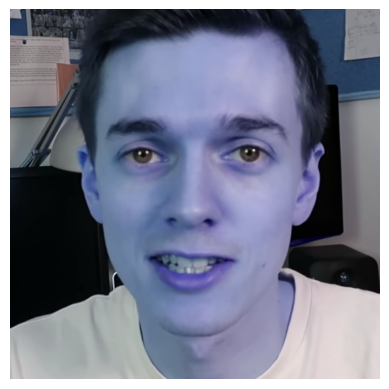

In [5]:
# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

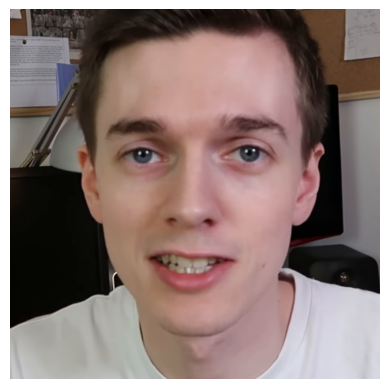

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()

In [7]:
height, width, channels = image.shape
print(f"Largura: {width} pixels")
print(f"Altura: {height} pixels")
print(f"Canais: {channels}")

Largura: 724 pixels
Altura: 724 pixels
Canais: 3


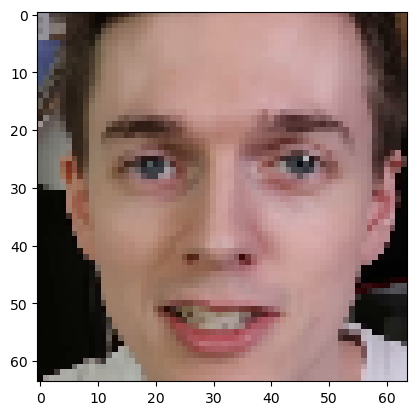

In [8]:
import cv2

# Load the pre-trained Haar cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_normalize_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) == 0:
        print("No face detected")
        return None

    for (x, y, w, h) in faces:
        face_region = image[y:y+h, x:x+w]
        
        # Resize to 64x64 pixels
        normalized_face = cv2.resize(face_region, (64, 64), interpolation=cv2.INTER_CUBIC)
        normalized_face = cv2.cvtColor(normalized_face, cv2.COLOR_BGR2RGB)
        
        return normalized_face


# Detect and normalize face
normalized_face = detect_and_normalize_face(image)

if normalized_face is not None:
    # Display the result
    plt.imshow(normalized_face)
   



In [9]:
def convert_to_hsv_ycbcr(normalized_face):
    # Convert RGB image to HSV color space
    hsv_image = cv2.cvtColor(normalized_face, cv2.COLOR_RGB2HSV)
    
    # Convert RGB image to YCbCr color space
    ycbcr_image = cv2.cvtColor(normalized_face, cv2.COLOR_RGB2YCrCb)
    
    return hsv_image, ycbcr_image

# Assuming normalized_face is your normalized RGB face image
# Load or generate the normalized face image first

# Convert normalized face image to HSV and YCbCr color spaces
hsv_image, ycbcr_image = convert_to_hsv_ycbcr(normalized_face)

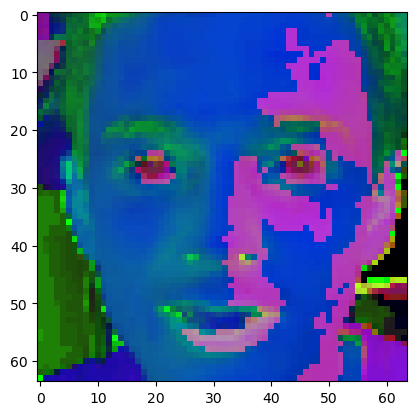

In [10]:
plt.imshow(hsv_image)

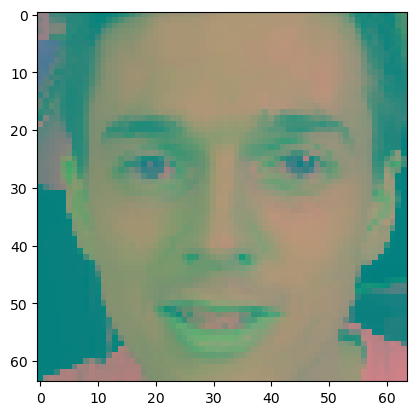

In [11]:
plt.imshow(ycbcr_image)

In [12]:
ycbcr_image.shape

(64, 64, 3)

In [13]:
from  lpq_descriptor import* 

In [14]:
%cd 'files_ok'

/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/LCC_FASD/files_ok


In [15]:
from pre_processing import *

In [16]:
c = ChanelExtractor(image_rgb)

In [17]:
[ch1_hsv, ch2_hsv, ch3_hsv],[ch1_ycbcr, ch2_ycbcr, ch3_ycbcr] =c.extractor()

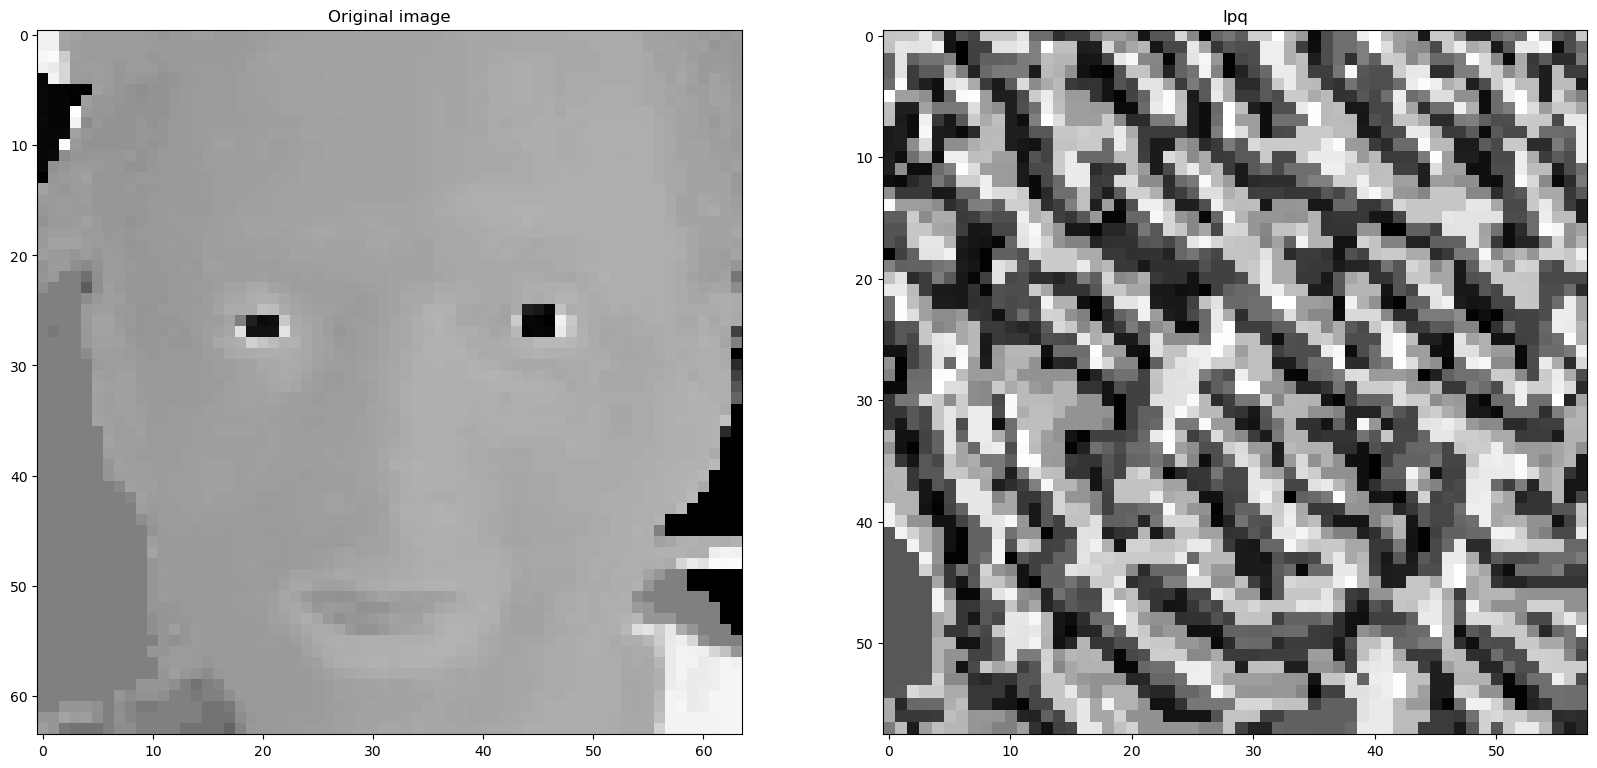

[[196 198 199 ...  89  72 200]
 [194 230 227 ...  13  76 108]
 [ 99 227  99 ...  44  44 124]
 ...
 [171  41 104 ... 111 109 108]
 [169  57  56 ...  43  47  45]
 [125 188  28 ...  59  27  42]]


In [18]:
lpq(channel=ch1_hsv , winSize=7,freqestim=1,mode='im')

Shape of Uniform LBP: (724, 724)
Shape of RI-LBP: (724, 724)


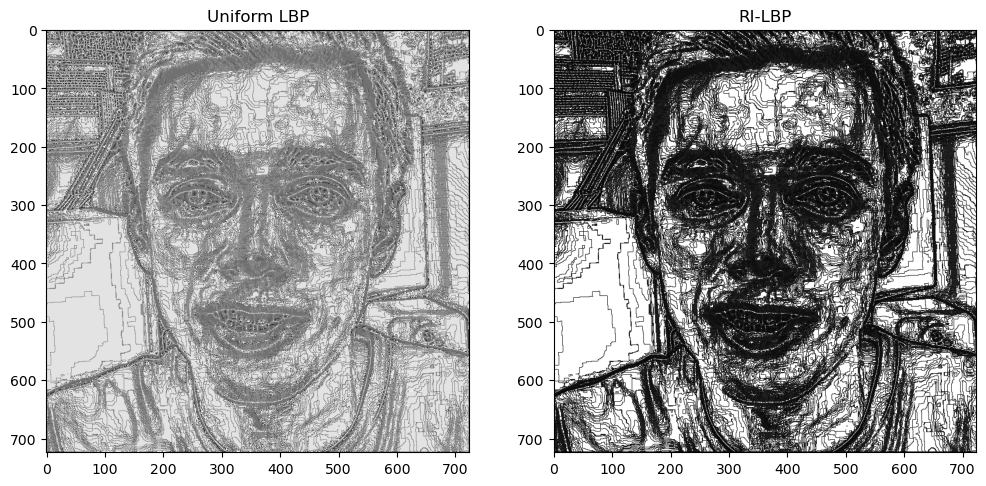

In [24]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

# Carregar a imagem
image =  cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Parâmetros para LBP
radius = 1  # Raio para LBP
n_points = 8 * radius  # Número de pontos em volta do pixel central

# Extrair Uniform LBP
lbp_uniform = local_binary_pattern(image, n_points, radius, method='uniform')

# Extrair Rotation Invariant LBP (RI-LBP)
lbp_ror = local_binary_pattern(image, n_points, radius, method='ror')

# Verificar as formas dos descritores
print("Shape of Uniform LBP:", lbp_uniform.shape)
print("Shape of RI-LBP:", lbp_ror.shape)

# Exemplo de visualização (opcional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(lbp_uniform, cmap='gray')
plt.title('Uniform LBP')

plt.subplot(1, 2, 2)
plt.imshow(lbp_ror, cmap='gray')
plt.title('RI-LBP')

plt.show()


In [28]:
import scipy.io as sio

In [29]:
 filters = sio.loadmat(f'/home/mds3/Downloads/Visao Computacional-20240430T145425Z-001/LCC_FASD/files_ok/ICAtextureFilters_7x7_8bit.mat')['ICAtextureFilters']

In [31]:
filters.shape

(7, 7, 8)